In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm


from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [4]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [5]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [6]:
#GMT
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_gmt_counts_LS133 = np.bincount(BX_LS133, weights=nGmtMuons_LS133)
bx_gmt_counts_LS263 = np.bincount(BX_LS263, weights=nGmtMuons_LS263)
bx_gmt_counts_LS264 = np.bincount(BX_LS264, weights=nGmtMuons_LS264)
bx_gmt_counts_LS306 = np.bincount(BX_LS306, weights=nGmtMuons_LS306)

bx_gmt_counts = (bx_gmt_counts_LS133 + bx_gmt_counts_LS263 + bx_gmt_counts_LS264 + bx_gmt_counts_LS306)/4


#BMTF
bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = (bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306)/4



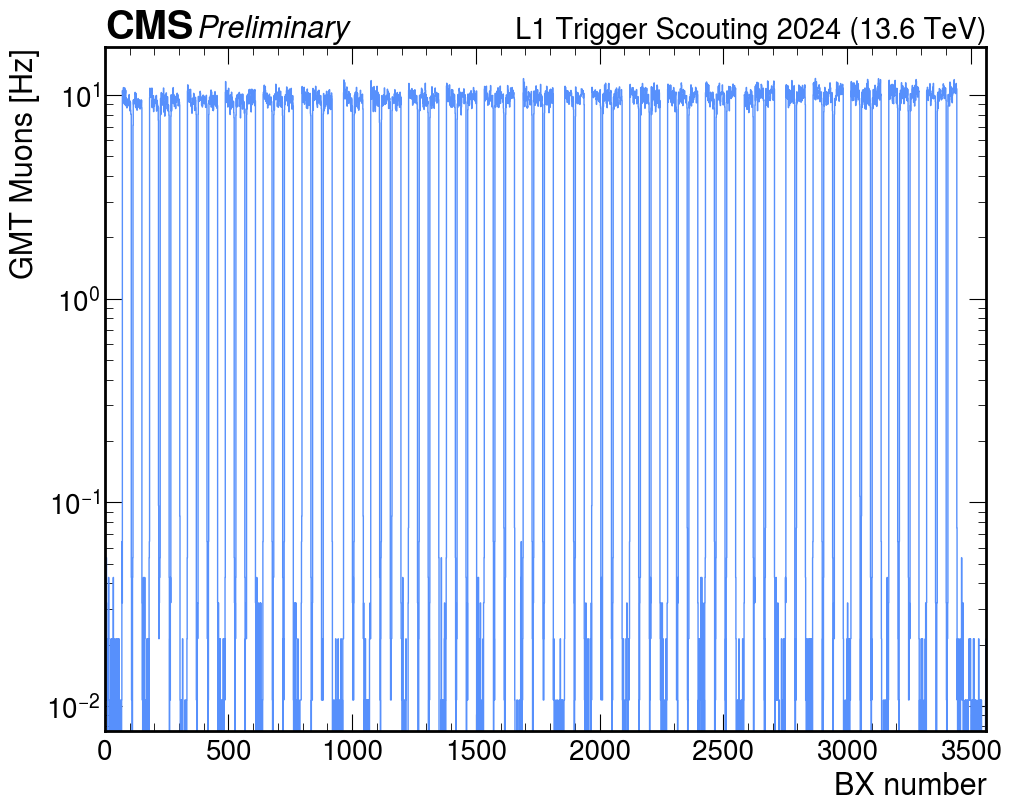

In [7]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_gmt_counts), histtype='step')
#ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.savefig("../Immagini/GMT.pdf")
plt.savefig("../Immagini/ImmaginiPNG/GMT.png")

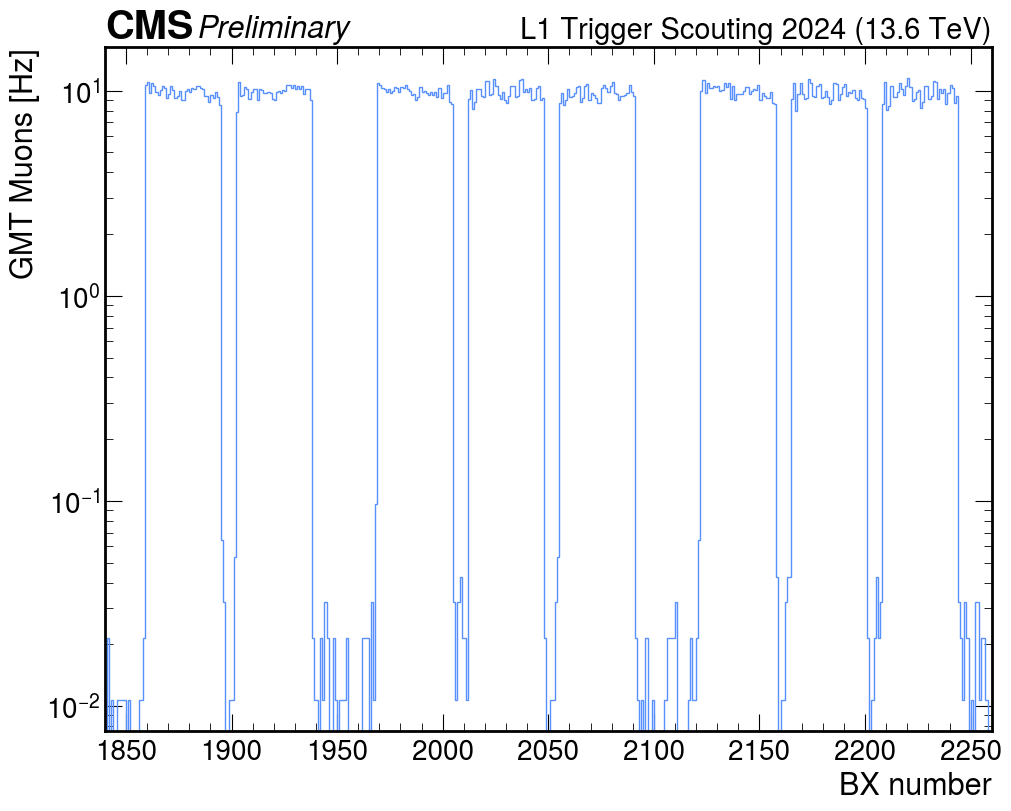

In [8]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_gmt_counts[bx_left:bx_right]), histtype='step')
#ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('GMT Muons [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')



In [9]:
nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306


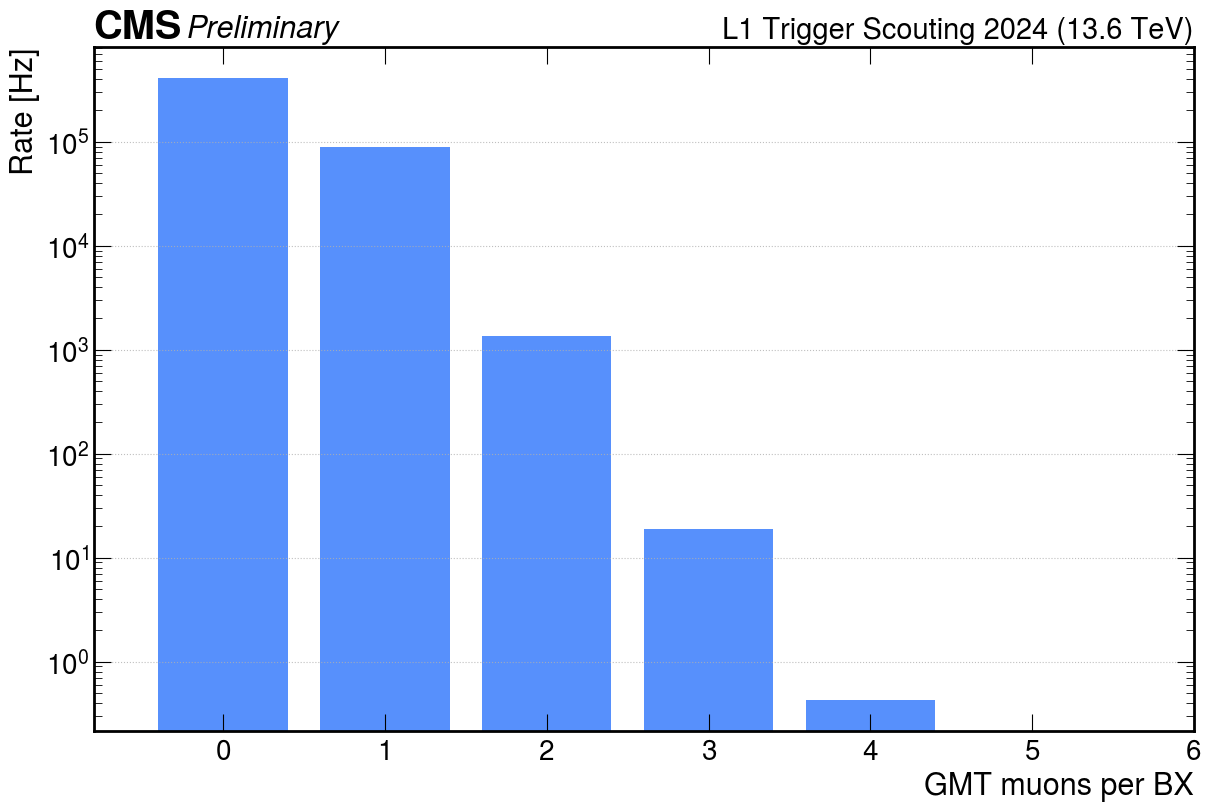

In [26]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('GMT muons per BX')
ax.set_ylabel('Rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# $\Delta R$



## Phi ed Eta GMT

In [11]:
#-----------------------------------------------GMT-----------------------------------------------
GmtQualLS133 = ak.flatten(gmt_awk_LS133.gmtQual)
GmtQualLS263 = ak.flatten(gmt_awk_LS263.gmtQual)
GmtQualLS264 = ak.flatten(gmt_awk_LS264.gmtQual)
GmtQualLS306 = ak.flatten(gmt_awk_LS306.gmtQual)

GmtEtaLS133 = ak.flatten(gmt_awk_LS133.gmtEta)
GmtEtaLS263 = ak.flatten(gmt_awk_LS263.gmtEta)
GmtEtaLS264 = ak.flatten(gmt_awk_LS264.gmtEta)
GmtEtaLS306 = ak.flatten(gmt_awk_LS306.gmtEta)

GmtPhiLS133 = ak.flatten(gmt_awk_LS133.gmtPhi)
GmtPhiLS263 = ak.flatten(gmt_awk_LS263.gmtPhi)
GmtPhiLS264 = ak.flatten(gmt_awk_LS264.gmtPhi)
GmtPhiLS306 = ak.flatten(gmt_awk_LS306.gmtPhi)

GmtPtLS133 = ak.flatten(gmt_awk_LS133.gmtPt)
GmtPtLS263 = ak.flatten(gmt_awk_LS263.gmtPt)
GmtPtLS264 = ak.flatten(gmt_awk_LS264.gmtPt)
GmtPtLS306 = ak.flatten(gmt_awk_LS306.gmtPt)

GmtPtuLS133 = ak.flatten(gmt_awk_LS133.gmtPtu)
GmtPtuLS263 = ak.flatten(gmt_awk_LS263.gmtPtu)
GmtPtuLS264 = ak.flatten(gmt_awk_LS264.gmtPtu)
GmtPtuLS306 = ak.flatten(gmt_awk_LS306.gmtPtu)

GmtQual = ak.concatenate([GmtQualLS133, GmtQualLS263, GmtQualLS264, GmtQualLS306])
GmtPhi = ak.concatenate([GmtPhiLS133, GmtPhiLS263, GmtPhiLS264, GmtPhiLS306])
GmtEta = np.array(ak.concatenate([GmtEtaLS133, GmtEtaLS263, GmtEtaLS264, GmtEtaLS306]))
GmtPt = np.array(ak.concatenate([GmtPtLS133, GmtPtLS263, GmtPtLS264, GmtPtLS306]))
GmtPtu = np.array(ak.concatenate([GmtPtuLS133, GmtPtuLS263, GmtPtuLS264, GmtPtuLS306]))

GmtPtDiff = GmtPt - GmtPtu

#-----------------------------------------------BMTF-----------------------------------------------

BmtfHwQualLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwQual)
BmtfHwQualLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwQual)
BmtfHwQualLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwQual)
BmtfHwQualLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwQual)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

BmtfPhiLS133 = ak.flatten(bmtf_awk_LS133.bmtfPhi)
BmtfPhiLS263 = ak.flatten(bmtf_awk_LS263.bmtfPhi)
BmtfPhiLS264 = ak.flatten(bmtf_awk_LS264.bmtfPhi)
BmtfPhiLS306 = ak.flatten(bmtf_awk_LS306.bmtfPhi)

BmtfPtLS133 = ak.flatten(bmtf_awk_LS133.bmtfPt)
BmtfPtLS263 = ak.flatten(bmtf_awk_LS263.bmtfPt)
BmtfPtLS264 = ak.flatten(bmtf_awk_LS264.bmtfPt)
BmtfPtLS306 = ak.flatten(bmtf_awk_LS306.bmtfPt)

BmtfPtuLS133 = ak.flatten(bmtf_awk_LS133.bmtfPtu)
BmtfPtuLS263 = ak.flatten(bmtf_awk_LS263.bmtfPtu)
BmtfPtuLS264 = ak.flatten(bmtf_awk_LS264.bmtfPtu)
BmtfPtuLS306 = ak.flatten(bmtf_awk_LS306.bmtfPtu)


BmtfPhi = ak.concatenate([BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])
BmtfWeights = np.array(ak.concatenate([BmtfHwQualLS133, BmtfHwQualLS263, BmtfHwQualLS264, BmtfHwQualLS306]))
BmtfPt = np.array(ak.concatenate([BmtfPtLS133, BmtfPtLS263, BmtfPtLS264, BmtfPtLS306]))
BmtfPtu = np.array(ak.concatenate([BmtfPtuLS133, BmtfPtuLS263, BmtfPtuLS264, BmtfPtuLS306]))

BmtfPtDiff = BmtfPt - BmtfPtu


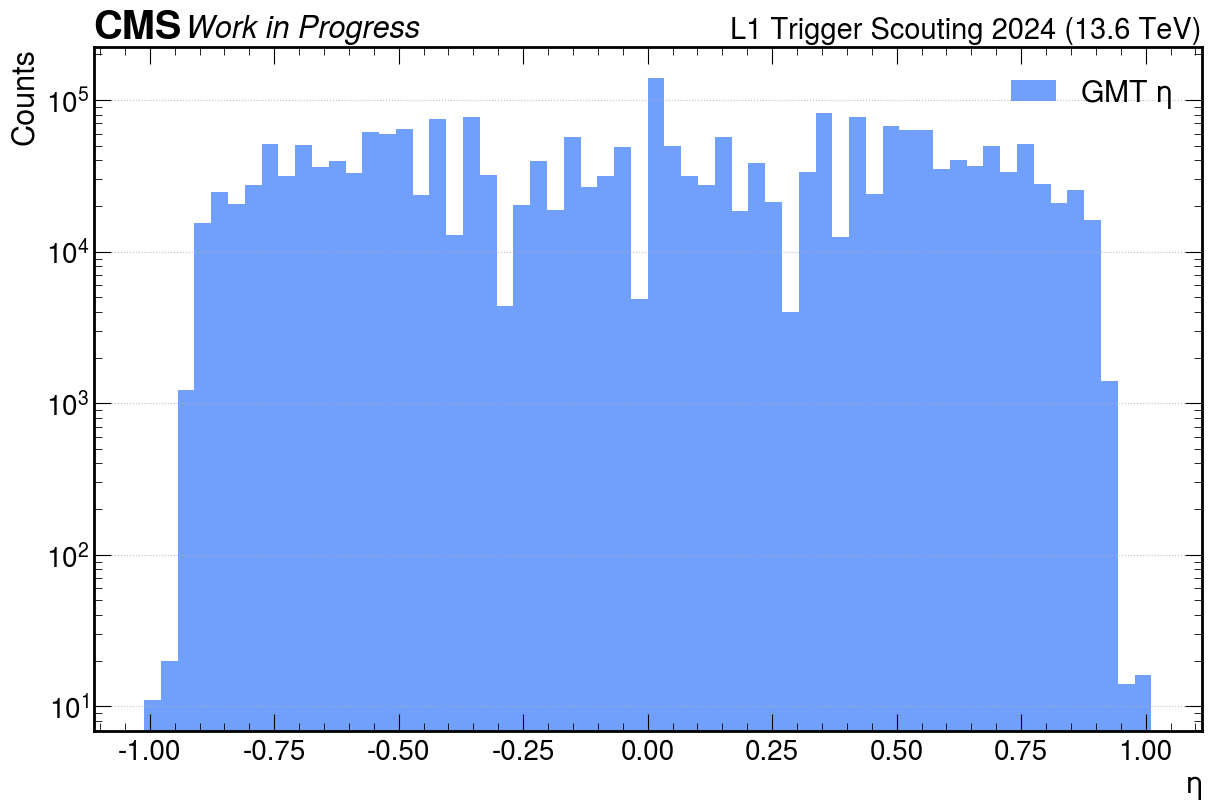

In [12]:
#Plot Eta 
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(GmtEta, bins = 60, alpha = 0.85, label=r'GMT $\eta$')
#ax.hist(BmtfEta, bins = 100, alpha = 0.85, label='BMTF $\eta$')

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Counts')
ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.show()

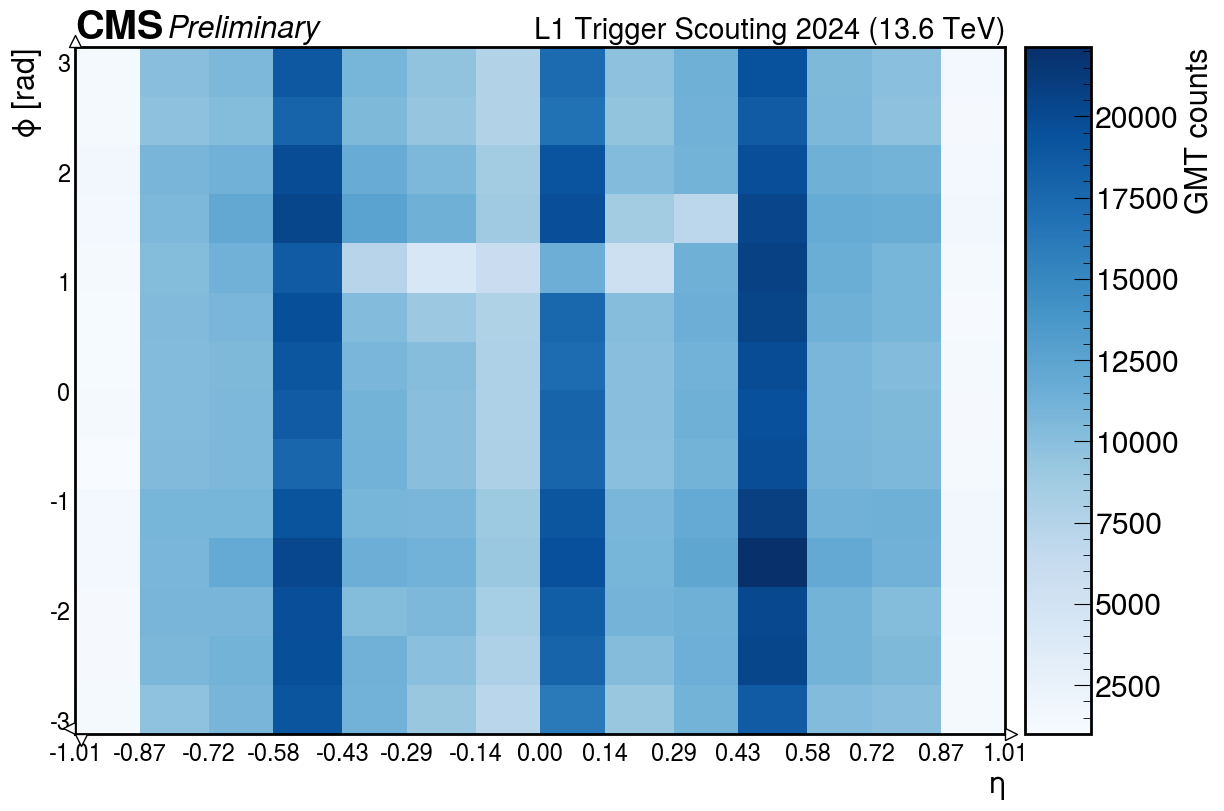

In [20]:
#Grafico bidimensionale per i GMT

BinPhi = 15
BinEta = 15


PhiRange, PhiIndicies = Bins(ak.min(GmtPhi), ak.max(GmtPhi), BinPhi, GmtPhi)
EtaRange, EtaIndicies = Bins(ak.min(GmtEta), ak.max(GmtEta), BinEta, GmtEta)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
    hist.axis.Variable(np.round(PhiRange, 2), name='Phi', label='Phi number'),
)
hist2d.fill(Phi=GmtPhi, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$ [rad]')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

'plt.savefig("../Immagini/BMTF_PtPtu.pdf")\nplt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'

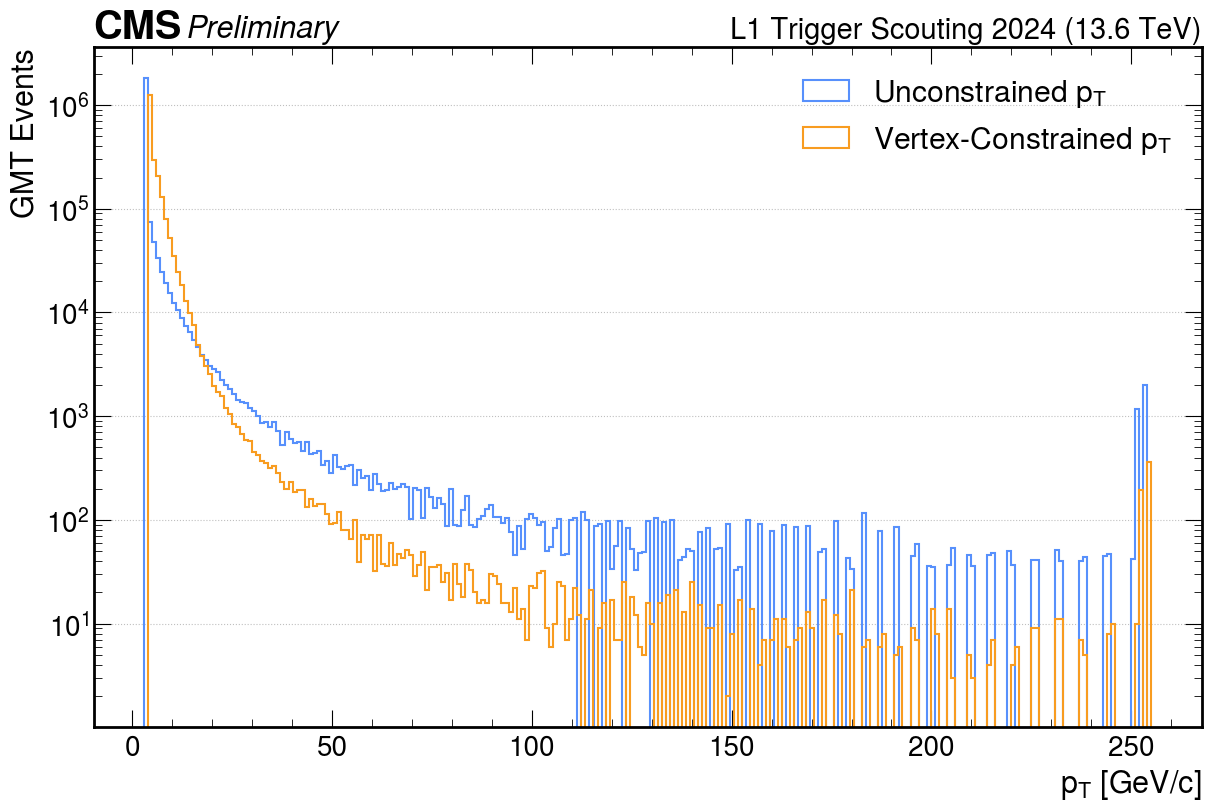

In [27]:
#Plot di Pt e Ptu uniti


fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(GmtPtu, bins = 250, label='Unconstrained $p_T$', histtype='step', linewidth = 1.5)
ax.hist(GmtPt, bins = 250, label='Vertex-Constrained $p_T$', histtype='step', linewidth = 1.5)

ax.set_xlabel(r'$p_T$ [GeV/c]')
ax.set_ylabel(r'GMT Events')
ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

'''plt.savefig("../Immagini/BMTF_PtPtu.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'''

(1.0, 3.007999897003174)


'plt.savefig("../Immagini/BMTF_PtPtu.pdf")\nplt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'

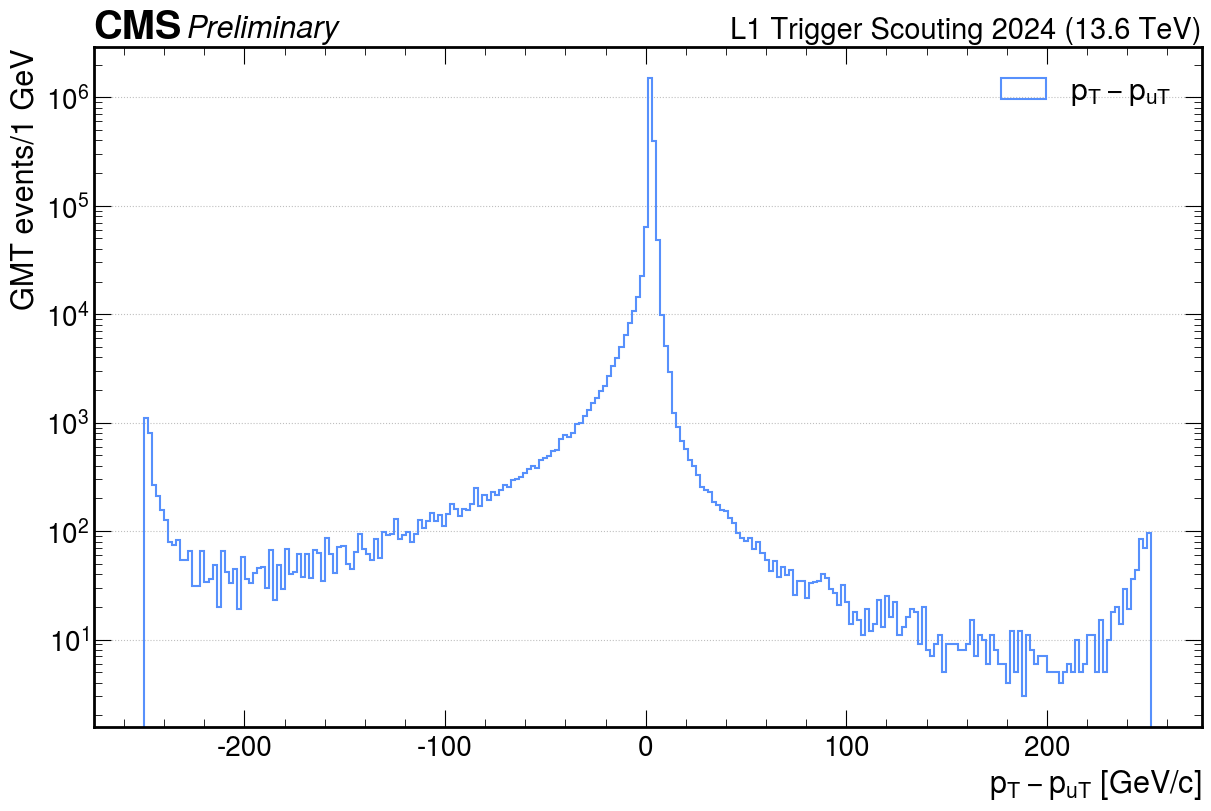

In [15]:
#Distribuzione della differenza
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

counts, bin_edges, _ = ax.hist(GmtPtDiff, bins = 250, label='$p_T - p_{uT}$', histtype='step', linewidth = 1.5)
#counts, bin_edges, _ = ax.hist(BmtfPtDiff, bins = 250, label='$p_T - p_{uT}$', histtype='step', linewidth = 1.5)

max_count = np.max(counts)
max_bin_index = np.argmax(counts)
max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

print(max_bin_range)

ax.set_xlabel(r'$p_T - p_{uT}$ [GeV/c]')
ax.set_ylabel(r'GMT events/1 GeV')
ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

'''plt.savefig("../Immagini/BMTF_PtPtu.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTF_PtPtu.png")'''

In [21]:
print(len(GmtPtDiff))

GmtEtaPtLeft = [GmtEta[i] for i in range(len(GmtPtDiff)) if GmtPtDiff[i] < 0]
GmtPtDiffLeft = GmtPtDiff[GmtPtDiff < 0]
GmtPtDiffRight = GmtPtDiff[GmtPtDiff >= 0]
GmtEtaPtRight = [GmtEta[i] for i in range(len(GmtPtDiff)) if GmtPtDiff[i] >= 0]

2139023


2139023


<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60641/1104270482.py:27: SyntaxWarning: invalid escape sequence '\e'
  hep.histplot(EtaPtLeft_Hist, label="$\eta$ with $p_T - p_{uT} < 0$", yerr = False)
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60641/1104270482.py:29: SyntaxWarning: invalid escape sequence '\e'
  hep.histplot(EtaPt_Hist, label="All $\eta$", yerr = False)


[2.61696983 0.89770677 0.83024308 1.10219662 0.78639053 0.92830138
 1.00741998 0.78770624 0.90595651 2.64366109]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_60641/1104270482.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1.5e6)


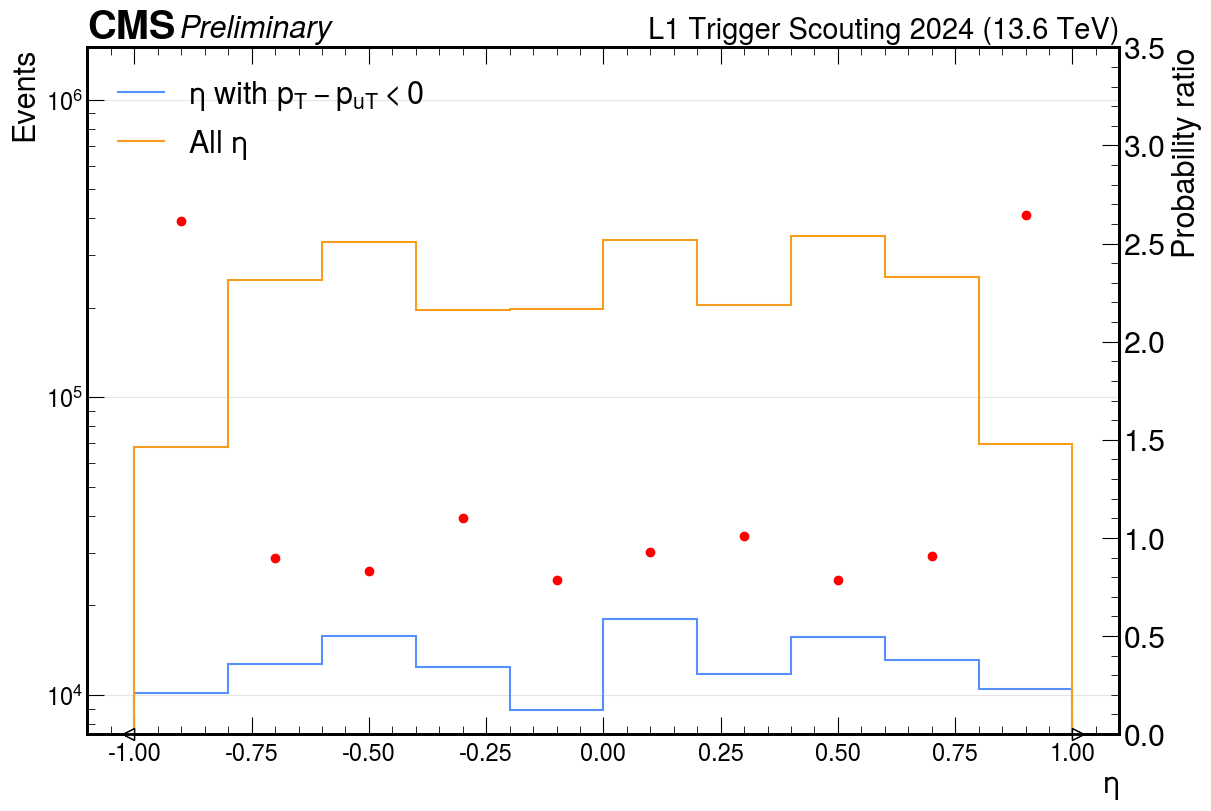

In [24]:
EtaRange = np.arange(-1, 1.2, 0.2)

EtaPtLeft_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPtRight_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPt_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)

EtaPtLeft_Hist.fill(Eta=GmtEtaPtLeft)
EtaPtRight_Hist.fill(Eta=GmtEtaPtRight)
EtaPt_Hist.fill(Eta=BmtfEta)

NormEtaPt = EtaPt_Hist.values()/ np.sum(EtaPt_Hist.values())
NormEtaPtLeft = EtaPtLeft_Hist.values()/ np.sum(EtaPtLeft_Hist.values())

EtaRatio = NormEtaPtLeft / NormEtaPt

centers = 0.5 * (EtaRange[1:] + EtaRange[:-1])

print(EtaRatio)


fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.histplot(EtaPtLeft_Hist, label="$\eta$ with $p_T - p_{uT} < 0$", yerr = False)
#hep.histplot(EtaPtRight_Hist)
hep.histplot(EtaPt_Hist, label="All $\eta$", yerr = False)

ax.set_ylabel(r'Events')
ax.set_xlabel(r'$\eta$')
ax.set_yscale("log")
ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)
#ax.legend()
ax.set_ylim(0, 1.5e6)

ax.legend(loc='upper left', fontsize = FONTSIZE)
ax2 = ax.twinx()

ax2.scatter(centers, EtaRatio, c = 'red')
ax2.set_ylim(0, 3.5)
ax2.set_ylabel("Probability ratio", fontsize = FONTSIZE)

'''plt.savefig("../Immagini/BMTFPhiEta.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTFPhiEta.png")'''

plt.show()

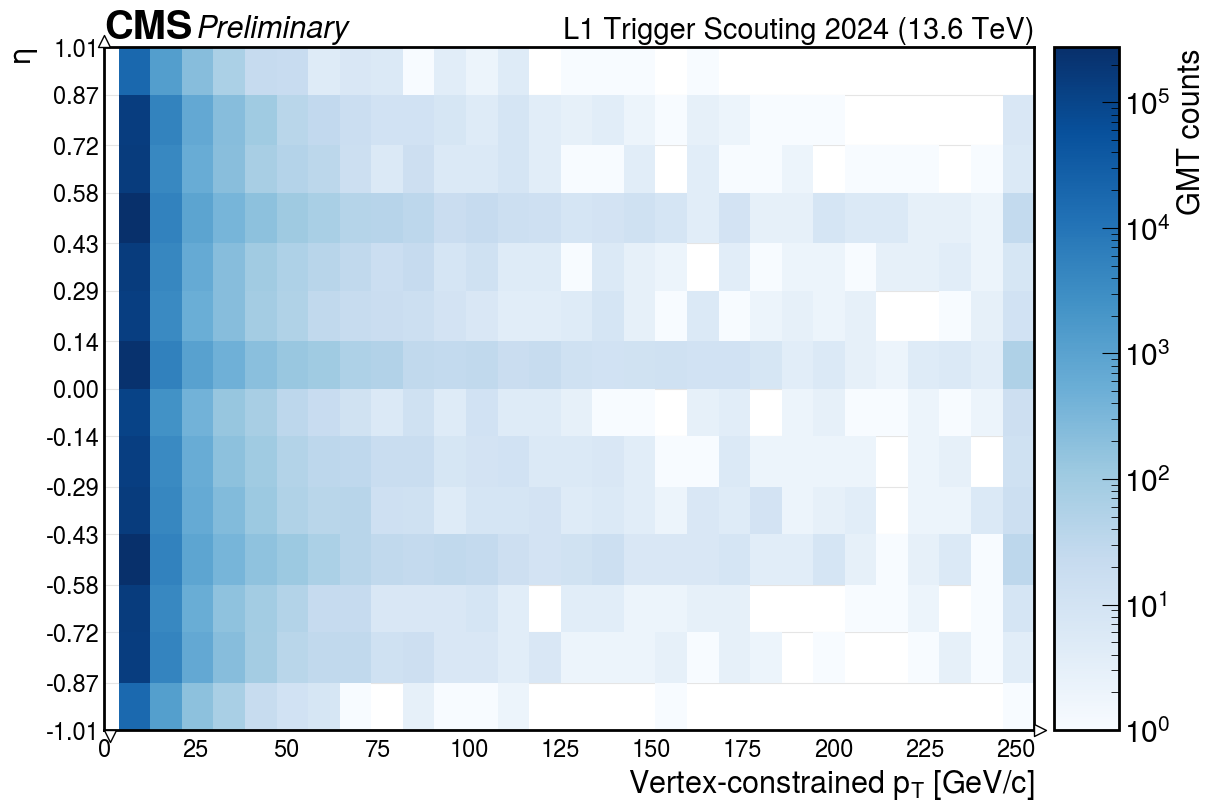

In [16]:
#Grafico bidimensionale per i GMT del momento e di eta 

BinEta = 15
BinPt = 30

EtaRange, EtaIndicies = Bins(ak.min(GmtEta), ak.max(GmtEta), BinEta, GmtEta)
PtRange, PtIndicies = Bins(ak.min(GmtPt), ak.max(GmtPt), BinPt, GmtPt)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtRange, 2), name='Pt', label='Pt number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Pt=GmtPt, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
#draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Vertex-constrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

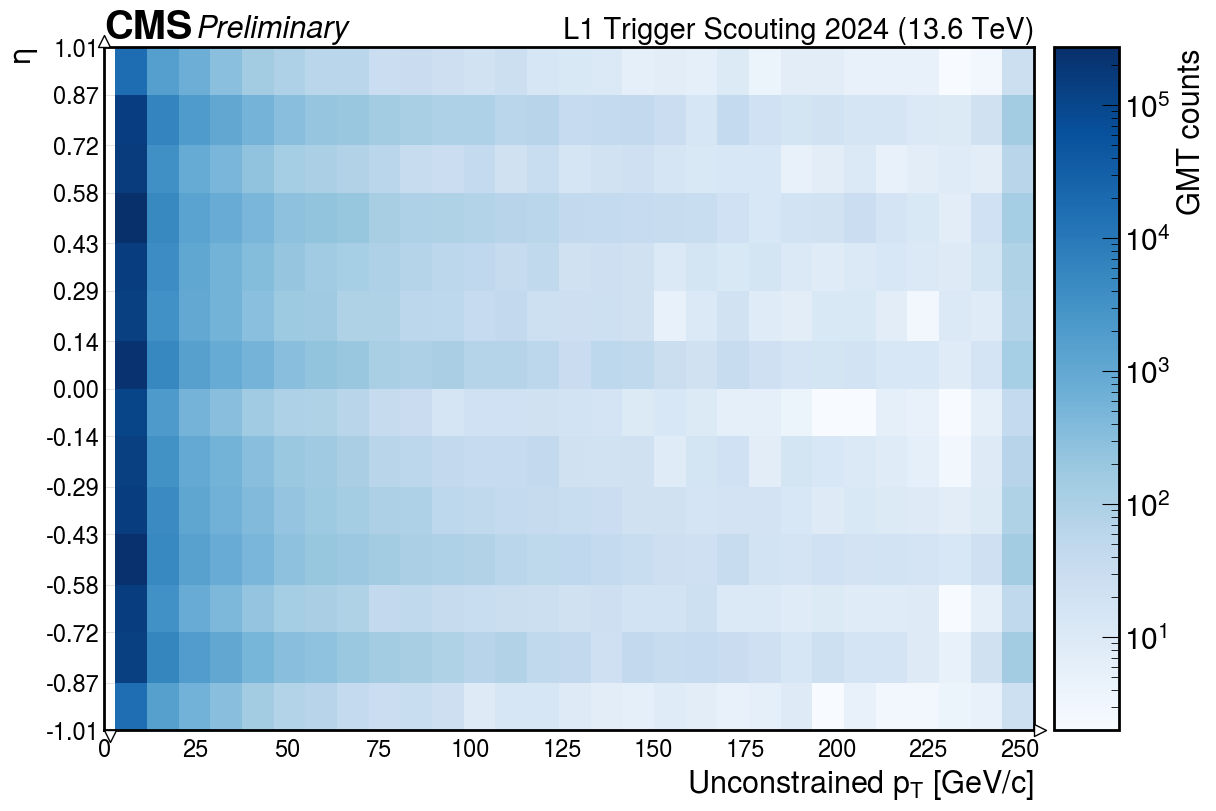

In [17]:
#Grafico bidimensionale per i GMT del momento e di eta 

BinEta = 15
BinPtu = 30

EtaRange, EtaIndicies = Bins(ak.min(GmtEta), ak.max(GmtEta), BinEta, GmtEta)
PtuRange, PtuIndicies = Bins(ak.min(GmtPtu), ak.max(GmtPtu), BinPtu, GmtPtu)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtuRange, 2), name='Ptu', label='Ptu number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Ptu=GmtPtu, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Unconstrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

# vertex constrained

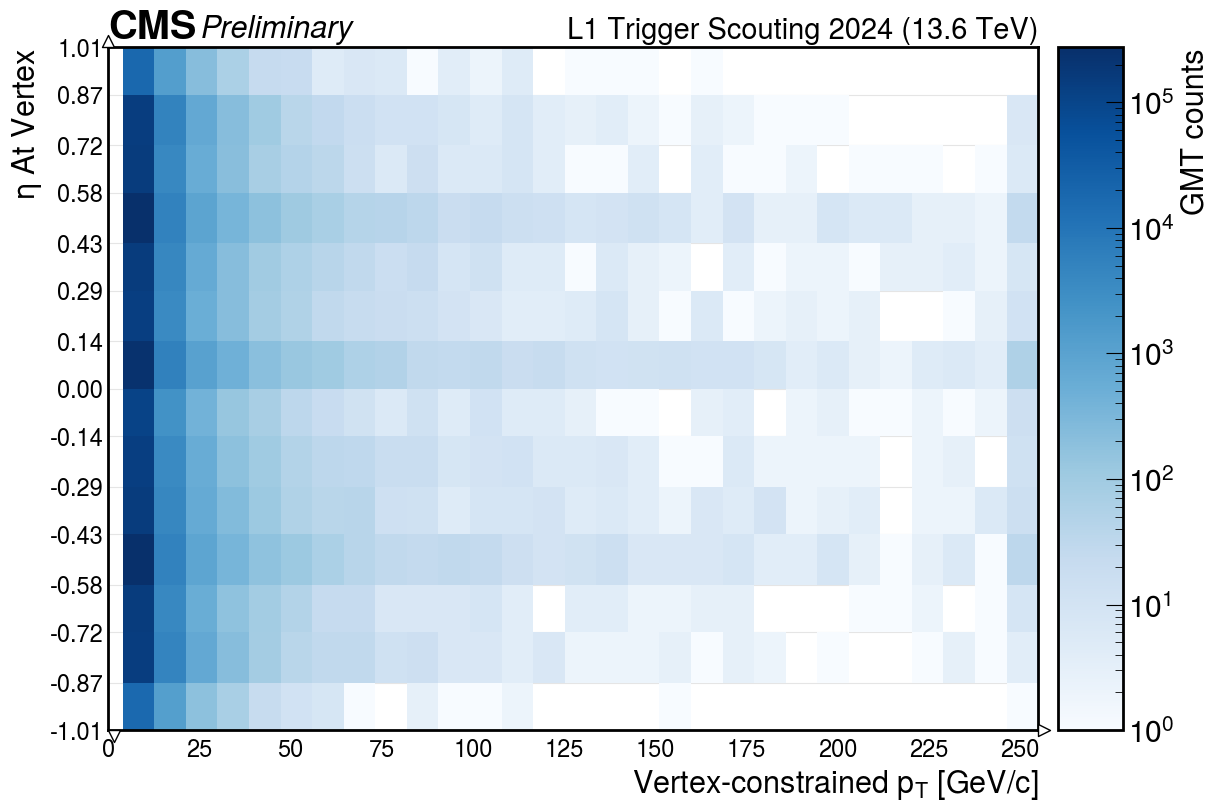

In [18]:
#Grafico bidimensionale per i GMT del momento e di eta 

GmtEtaAV = ak.flatten(ak.concatenate([gmt_awk_LS133.gmtEtaAtVtx, gmt_awk_LS263.gmtEtaAtVtx, gmt_awk_LS264.gmtEtaAtVtx, gmt_awk_LS306.gmtEtaAtVtx], axis = 0))

BinEtaAV = 15
BinPt = 30

EtaRangeAV, EtaIndicies = Bins(ak.min(GmtEtaAV), ak.max(GmtEtaAV), BinEtaAV, GmtEtaAV)
PtRange, PtIndicies = Bins(ak.min(GmtPt), ak.max(GmtPt), BinPt, GmtPt)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtRange, 2), name='Pt', label='Pt number'),
    hist.axis.Variable(np.round(EtaRangeAV, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Pt=GmtPt, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
#draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Vertex-constrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$ At Vertex')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

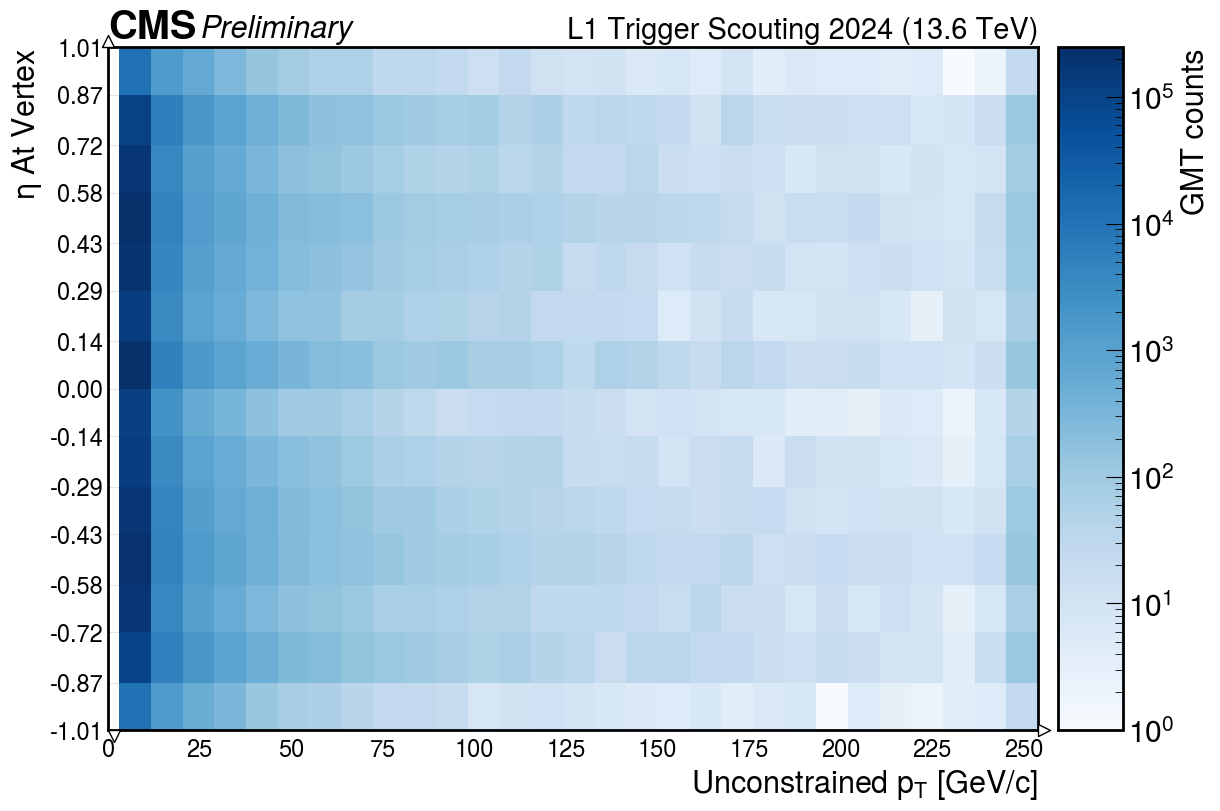

In [19]:
#Grafico bidimensionale per i GMT del momento e di eta 

GmtEtaAV = ak.flatten(ak.concatenate([gmt_awk_LS133.gmtEtaAtVtx, gmt_awk_LS263.gmtEtaAtVtx, gmt_awk_LS264.gmtEtaAtVtx, gmt_awk_LS306.gmtEtaAtVtx], axis = 0))

BinEta = 15
BinPtu = 30

EtaRangeAV, EtaIndicies = Bins(ak.min(GmtEtaAV), ak.max(GmtEtaAV), BinEta, GmtEtaAV)
PtuRange, PtuIndicies = Bins(ak.min(GmtPtu), ak.max(GmtPtu), BinPtu, GmtPtu)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtuRange, 2), name='Ptu', label='Ptu number'),
    hist.axis.Variable(np.round(EtaRangeAV, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Ptu=GmtPtu, Eta=GmtEtaAV)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE, rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Unconstrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$ At Vertex')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)